# UCI Glass Detection Dataset



# Outline

- Importing libraries
- Importing Dataset
- Exploring Dataset
- Preparing Dataset
- Removing Outliers
- Visualization of dataset
- Train/Test Split
- Applying Machine Learning Models
- Summary
- Method 2 to solve dataset

## Machine Learning Models that are applied:

- KNN
- Logistic Regression
- Decision Tree
- SVM (Linear Kernal)
- SVM (Non Linear Kernal)
- Random Forest
- Neural Network
- Gradient Decent Tree Boosting

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
#import seaborn as sns

## Importing Dataset

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data'
data = pd.read_csv(url, header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


## Exploring Dataset

1.Shape of dataset  
2.Count of Null values  
3.Uniques values  
4.Statisitics of dataset

In [3]:
data.shape

(214, 11)

In [4]:
data.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
dtype: int64

In [5]:
data[10].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: 10, dtype: int64

In [6]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,10
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


#### Above statistics shows that data is across all attributes is not in same range, so we will normalize the data first

## Preparing Dataset

#### Adding meaningful column/attribute names

In [7]:
names = ['Id','RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','glass_type']
data.columns = names
data.head()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass_type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


#### Removing unnecessary columns

In [8]:
data = data.drop('Id',1)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_43908\1709265294.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data = data.drop('Id',1)


In [9]:
data.head(3)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass_type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1


## Checking outlies through Z-score 

In [10]:
from scipy import stats

z = abs(stats.zscore(data))

#np.where(z > 3)

data = data[(z < 3).all(axis=1)]

#data.shape

### Separating Features and Label

In [11]:
features = ['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe']
label = ['glass_type']

X = data[features]

y = data[label]

In [12]:
X.shape

(194, 9)

In [13]:
type(X)

pandas.core.frame.DataFrame

## Data Visualization

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


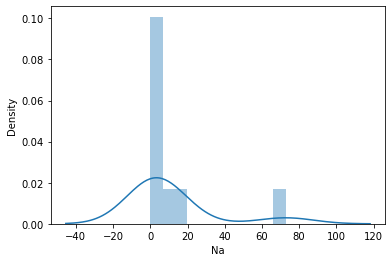

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


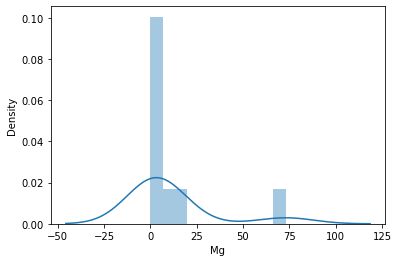

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


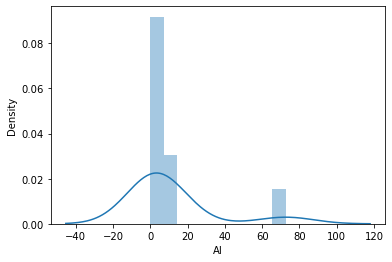

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


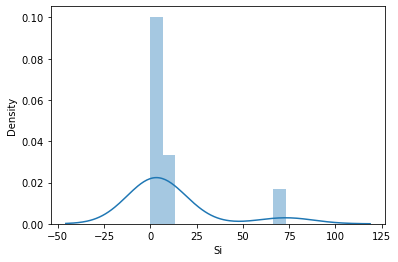

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


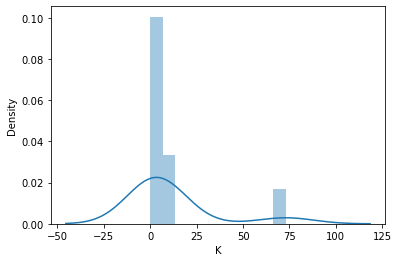

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


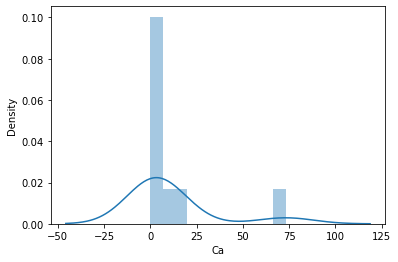

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


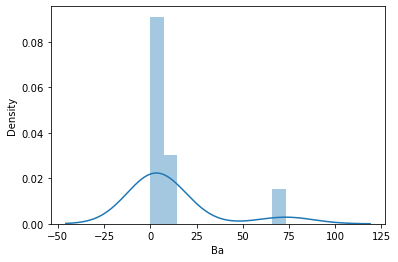

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


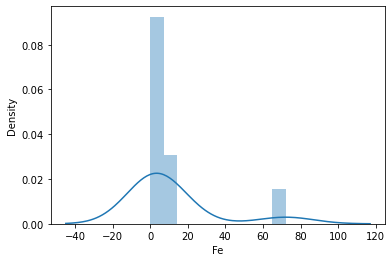

In [14]:
x2 = X.values

from matplotlib import pyplot as plt
import seaborn as sns
for i in range(1,9):
        sns.distplot(x2[i])
        plt.xlabel(features[i])
        plt.show()

- Above diagrams shows that our dataset is skewed either on positive side or negative side and data is not normalized

<Figure size 576x576 with 0 Axes>

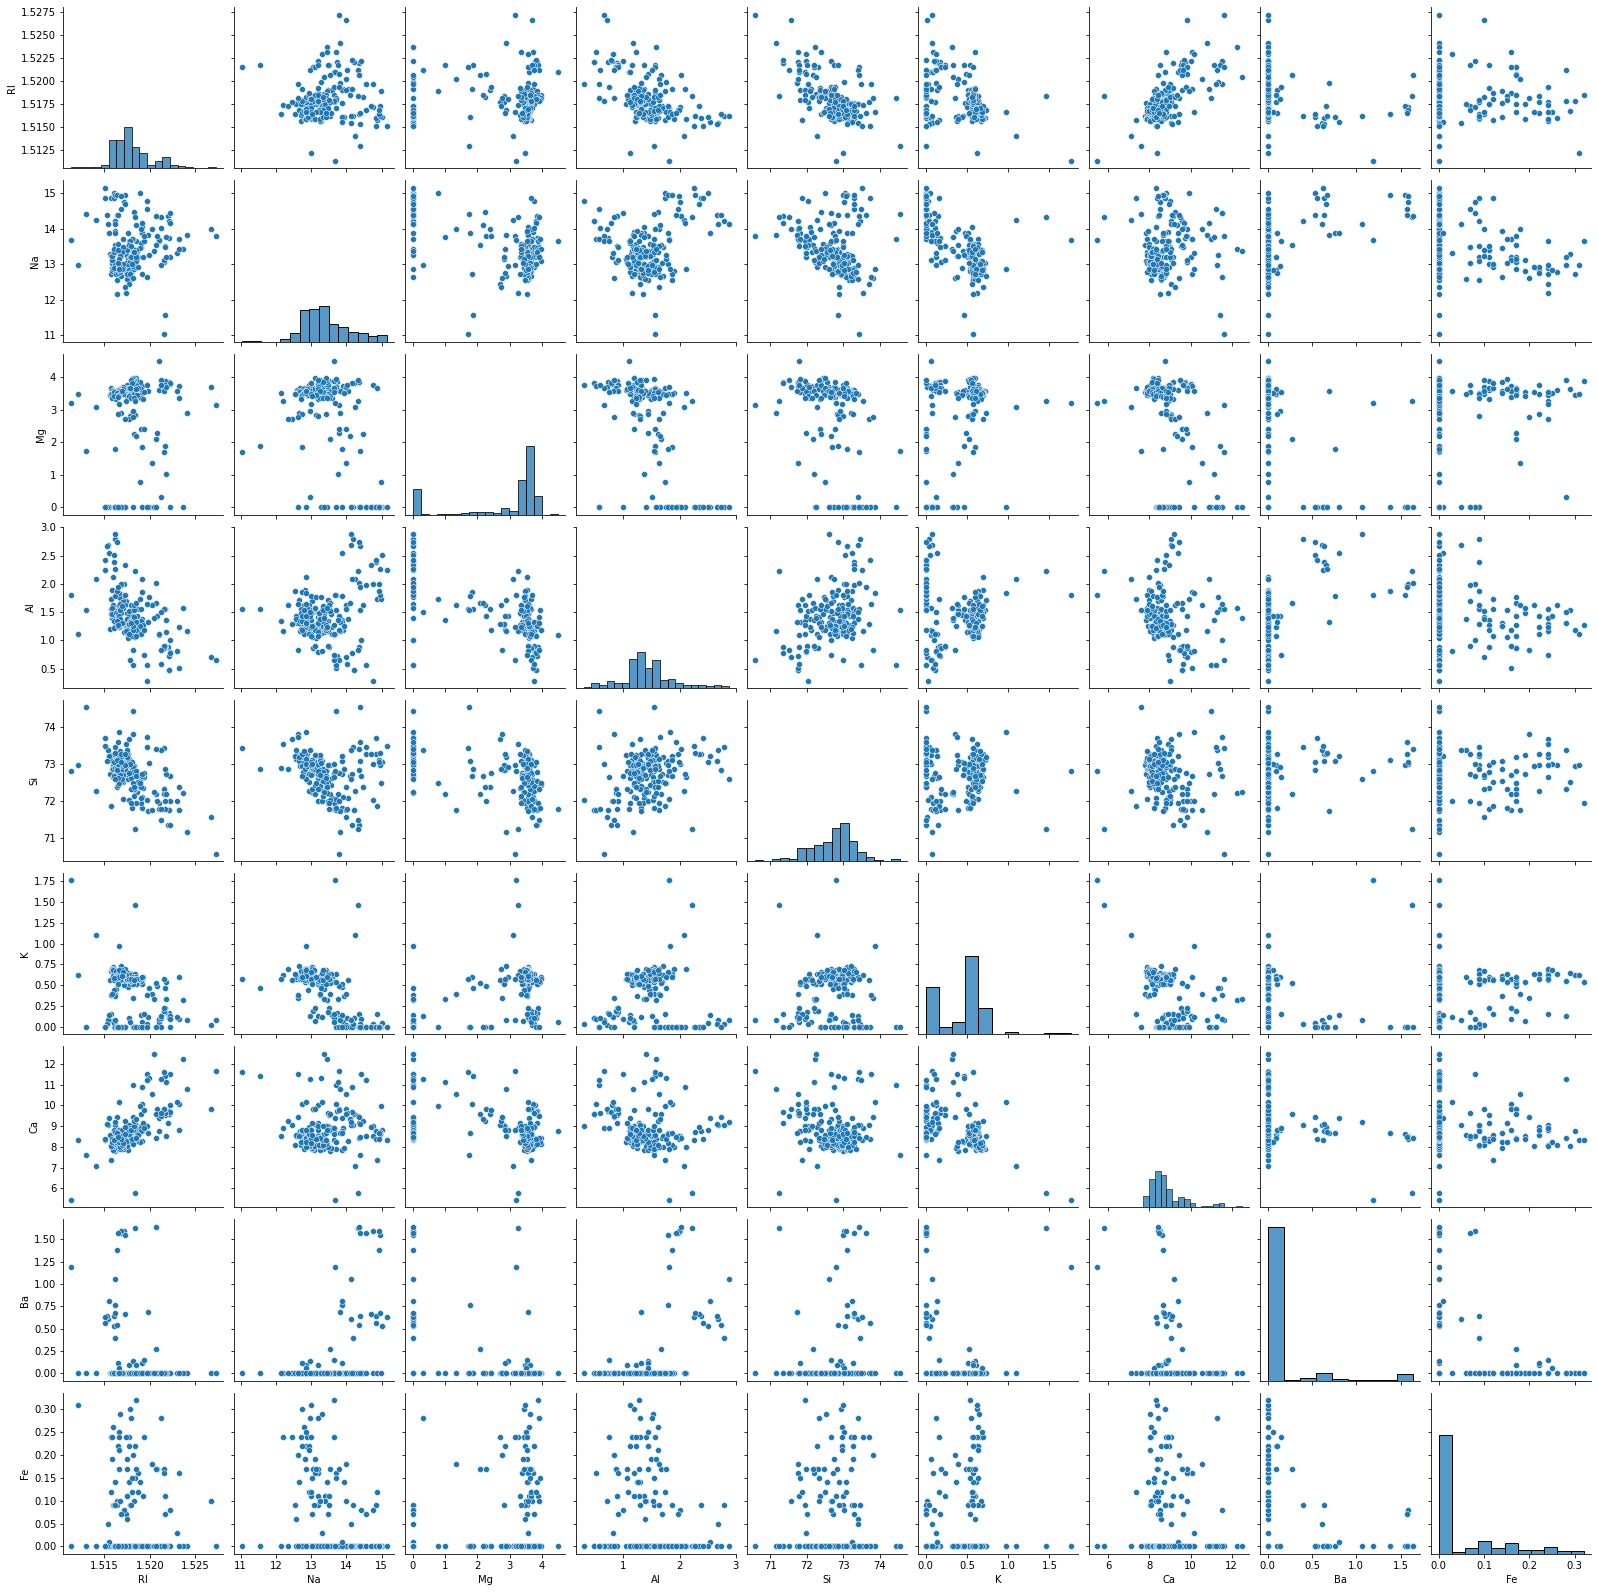

In [15]:
x2 = pd.DataFrame(X)

plt.figure(figsize=(8,8))
sns.pairplot(data=x2)
plt.show()

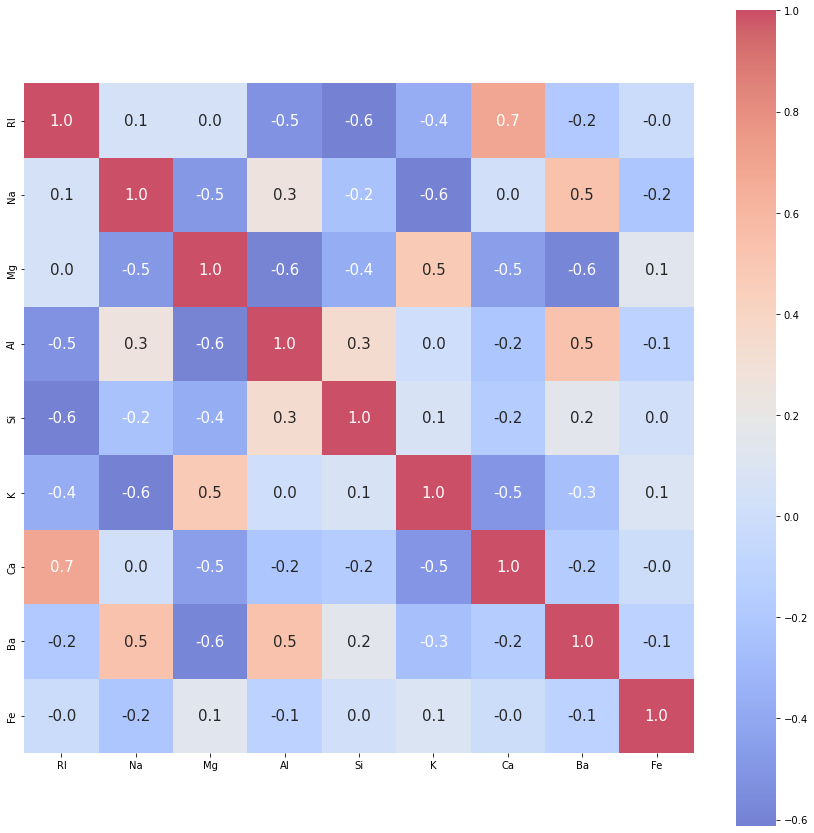

In [16]:
coreleation= X.corr()
plt.figure(figsize=(15,15))
sns.heatmap(coreleation,cbar=True,square=True,annot=True,fmt='.1f',annot_kws={'size': 15},xticklabels=features,yticklabels=features,alpha=0.7,cmap= 'coolwarm')
plt.show()

Our Diagram shows correaltion between different features
Conclusion:
- RI and Ca have strong correlation between each other
- AI and ba have intermediate correlation between each other 

#### Scalling the data  (1-0 range)

In [17]:
## normalizing/Scalling the data  

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
#scaler.fit(X)
#X = scaler.transform(X)
#X = pd.DataFrame(X)

In [18]:
X.head(2)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0


In [19]:
y.head(2)

,glass_type
0,1
1,1


### Scalling the features

In [20]:
from sklearn import preprocessing
X=preprocessing.scale(X)

## Visualizing Data after Preprocessing

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


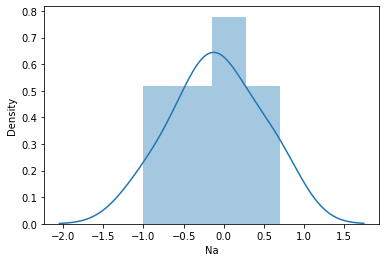

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


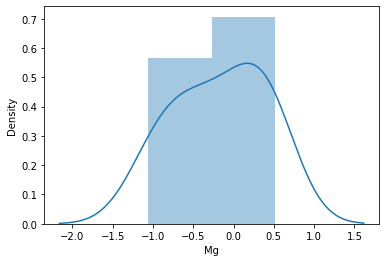

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


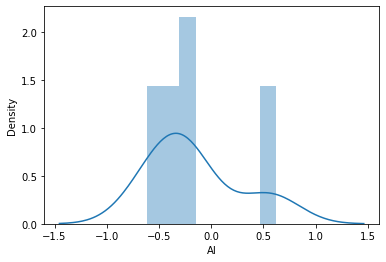

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


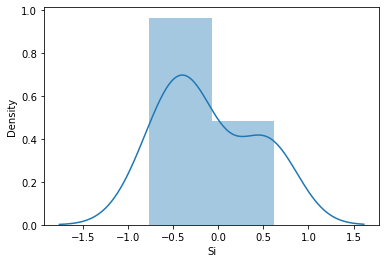

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


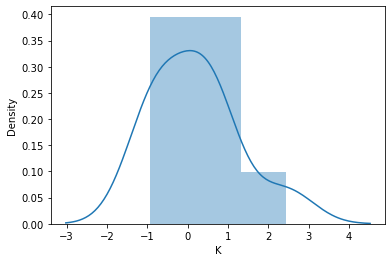

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


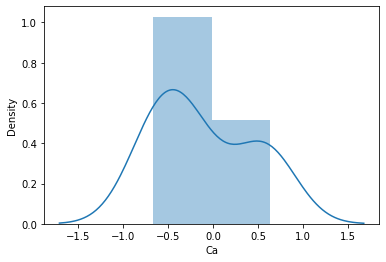

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


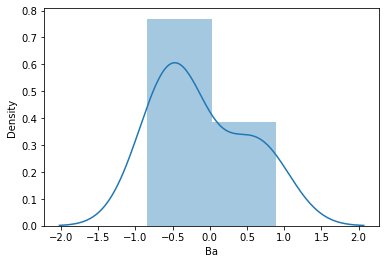

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


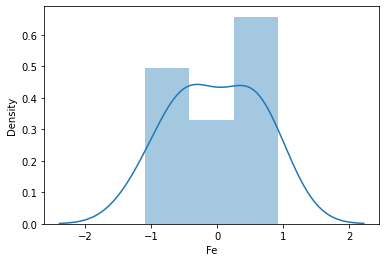

In [21]:
x2 = X

from matplotlib import pyplot as plt
import seaborn as sns
for i in range(1,9):
        sns.distplot(x2[i])
        plt.xlabel(features[i])
        plt.show()

- Above diagrams show that after preprocessing skewness is reduced, and data is more normalized

## Train Test Split

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0,stratify=y)

In [24]:
## Flattening the array
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

In [25]:
print('Shape of X_train = ' + str(X_train.shape))
print('Shape of X_test = ' + str(X_test.shape))
print('Shape of y_train = ' + str(y_train.shape))
print('Shape of y_test = ' + str(y_test.shape))

Shape of X_train = (145, 9)
Shape of X_test = (49, 9)
Shape of y_train = (145,)
Shape of y_test = (49,)


## Applying Different Machine learning Models

### 1.KNN

In [26]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

Scores = []

for i in range (2,11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    score = knn.score(X_test,y_test)
    Scores.append(score)

print(knn.score(X_train,y_train))
print(Scores)

0.6896551724137931
[0.7142857142857143, 0.6530612244897959, 0.7346938775510204, 0.7142857142857143, 0.673469387755102, 0.6530612244897959, 0.6938775510204082, 0.6938775510204082, 0.6938775510204082]


### 2.Decision Tree

In [27]:
from sklearn.tree import DecisionTreeClassifier

Scores = []

for i in range(1):
    tree = DecisionTreeClassifier(random_state=0)
    tree.fit(X_train, y_train)
    score = tree.score(X_test,y_test)
    Scores.append(score)

print(tree.score(X_train,y_train))
print(Scores)

1.0
[0.5510204081632653]


### 3.Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression

Scores = []

for i in range(1):
    logistic = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial',max_iter=100)
    logistic.fit(X_train, y_train)
    score = logistic.score(X_test,y_test)
    Scores.append(score)
    
print(logistic.score(X_train,y_train))
print(Scores)

0.7517241379310344
[0.6938775510204082]


### 4.SVC Classifier (Non-Linear Kernal)

In [29]:
from sklearn.svm import SVC

Scores = []

for i in range(1):
    svc = SVC(gamma='auto')
    svc.fit(X_train, y_train)
    score = svc.score(X_test,y_test)
    Scores.append(score)

print(svc.score(X_train,y_train))
print(Scores)

0.7517241379310344
[0.7551020408163265]


### 5.SVC Classifier (Linear Kernal)

In [30]:
from sklearn.svm import LinearSVC

Scores = []

for i in range(1):
    svc = LinearSVC(random_state=0)
    svc.fit(X_train, y_train)
    score = svc.score(X_test,y_test)
    Scores.append(score)

print(svc.score(X_train,y_train))
print(Scores)

0.7517241379310344
[0.6938775510204082]


C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


### 6.Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier

Scores = []
Range = [10,20,30,50,70,80,100,120]

for i in range(1):
    forest = RandomForestClassifier(criterion='gini', n_estimators=10, min_samples_leaf=1, min_samples_split=4, random_state=1,n_jobs=-1)
    #forest = RandomForestClassifier(n_estimators=i ,random_state=0)
    forest.fit(X_train, y_train)
    score = forest.score(X_test,y_test)
    #Scores.append(score)

print(forest.score(X_train,y_train))
print(score)

0.9724137931034482
0.7755102040816326


### 7.Neural Network

In [32]:
from sklearn.neural_network import MLPClassifier

Scores = []

for i in range(1):
    NN = MLPClassifier(random_state=0)
    NN.fit(X_train, y_train)
    score = NN.score(X_test,y_test)
    Scores.append(score)

print(NN.score(X_train,y_train))
print(Scores)

0.7931034482758621
[0.7551020408163265]


C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


### 8.Gradient Decent Tree Boosting

In [33]:
from sklearn.ensemble import GradientBoostingClassifier

gd = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)

gd.fit(X_train, y_train)
score = gd.score(X_test,y_test)

print(gd.score(X_train,y_train))
print(score)

0.9724137931034482
0.6326530612244898


# Summary

#### Out of all above models:

1. Randorm forest is giving best result with:  

    - training accuracy: 0.9793103448275862  
    - test accuracy: 0.7755102040816326

#### But since it is overfitting we will choose next best model that is:

2. SVM (Non Linear Kernal)
    
    - training accuracy: 0.7586206896551724
    - testing accuracy:  0.7551020408163265

# Method 2 -----------------------------------

In [34]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data'
data = pd.read_csv(url, header=None)


names = ['Id','RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','glass_type']
data.columns = names

data.describe()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass_type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


- In columns [RI,Na,Mg,AI,Si] there is no big difference in  min and max so not much of a variance.
- In [K,Ca,Ba,fe] There is big difference in min and max value.

- We will divide the 7 categories of label class in to two categories of 1 and 2

In [35]:
glass_type = []
for i in data['glass_type']:
    if i >= 1 and i <= 4:
        glass_type.append('1')
    elif i >= 5 and i <= 7:
        glass_type.append('2')

data['glass_type'] = glass_type

set(glass_type)

{'1', '2'}

### Processing the Data 

In [36]:
features = ['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe']
label = ['glass_type']

X = data[features]

y = data[label]

In [37]:
y['glass_type'].unique()

array(['1', '2'], dtype=object)

In [38]:
from sklearn import preprocessing
X = preprocessing.scale(X)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0,stratify=y)

## Flattening the array
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

In [40]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)
score = forest.score(X_test,y_test)

print(forest.score(X_train,y_train))
print(score)

1.0
0.9230769230769231
